<a href="https://colab.research.google.com/github/sauragr/datasciencecoursera/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline


In [4]:
dataset = MNIST(root = 'data/' , download = True , transform = ToTensor())

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 127MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 19.0MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 88.0MB/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.86MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
len(dataset)

60000

In [6]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds , val_ds = random_split(dataset , (train_size , val_size))
len(train_ds) , len(val_ds)

(50000, 10000)

In [8]:
batch_size = 128

In [9]:
train_loader = DataLoader(train_ds , batch_size , shuffle = True , num_workers = 4,pin_memory = True)
val_loader = DataLoader(val_ds , batch_size*2,num_workers = 4,pin_memory = True)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


images.shape: torch.Size([128, 1, 28, 28])


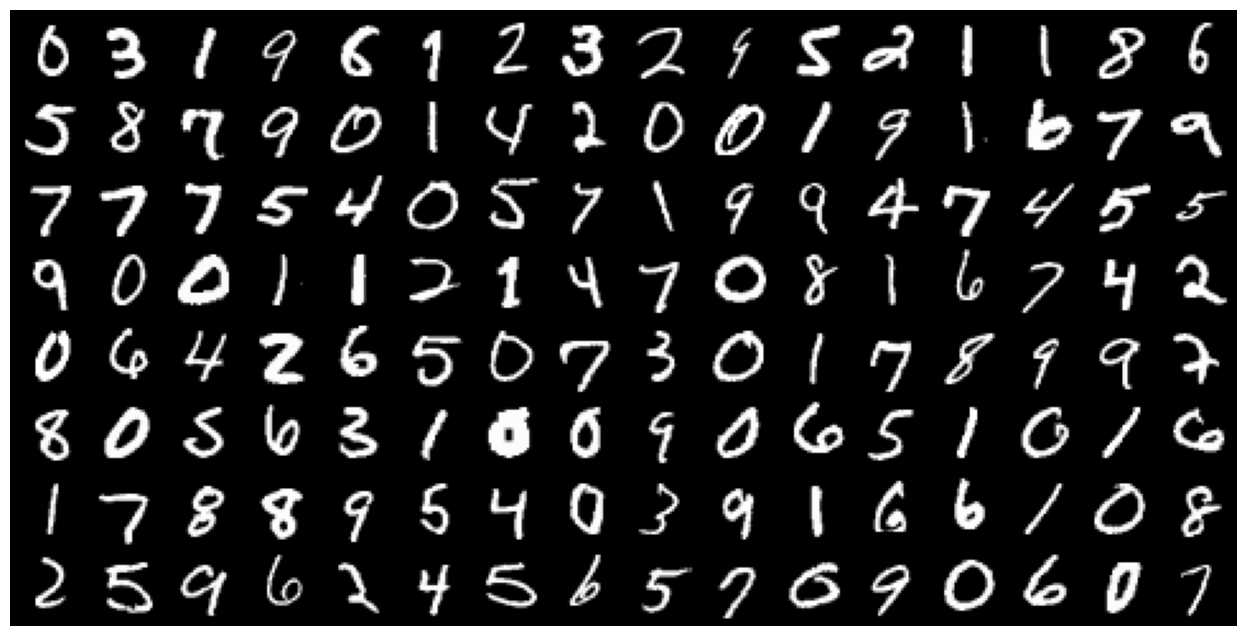

In [10]:
#Looking at a batch of data
#(batch_size, height, width, channels)format matplotlib expects for displaying images
for images , _ in train_loader:
  print('images.shape:' , images.shape)
  plt.figure(figsize =(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images , nrow = 16).permute(1,2,0))
  break

In [11]:
#Flatten 1*28*28 images into vector size of 784
for images , labels in train_loader:
  print('images.shape:'  , images.shape)
  inputs = images.reshape(-1,784)
  print('inputs.shape:', inputs.shape)
  break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [12]:
#HiddenLayer
input_size = inputs.shape[-1]
hidden_size = 32

In [13]:
#Defining Hidden Layer
layer1 = nn.Linear(input_size , hidden_size)

In [14]:
inputs.shape

torch.Size([128, 784])

In [15]:
layer1_outputs = layer1(inputs)# = inputs*layer1.weights.t() + bias
print('layer1_outputs.shape:' , layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [16]:
#Applying Activation Functions
F.relu(torch.tensor([[1,-1,-2] , [0,0.5,-4]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.5000, 0.0000]])

In [17]:
relu_outputs = F.relu(layer1_outputs)
print(torch.min(layer1_outputs).item())
print(torch.min(relu_outputs).item())

-0.6878917813301086
0.0


In [18]:
#OutputLayer
output_size = 10
layer2 = nn.Linear(hidden_size , output_size)

In [19]:
layer2_outputs = layer2(relu_outputs)

In [20]:
layer2_outputs.shape

torch.Size([128, 10])

In [21]:
F.cross_entropy(layer2_outputs , labels)

tensor(2.3148, grad_fn=<NllLossBackward0>)

In [22]:
#Expanded version of layer2 outputs
outputs = ((F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias)

In [23]:
torch.allclose(outputs , layer2_outputs, 1e-3)

True

In [24]:
torch.cuda.is_available()

False

In [25]:
class MnistModel(nn.Module):
  def __init__(self , in_size , hidden_size , out_size):
    super().__init__()
    #hiddenlayer
    self.linear1 = nn.Linear(in_size , hidden_size)
    #outputlayer
    self.linear2 = nn.Linear(hidden_size , out_size)

  def forward(self , xb):
    #Flatten the image Tensors
    #xb = xb.reshape(-1,xb.shape[-1])
    xb = xb.view(xb.size(0), -1)
    #get intermediate output using hidden layer
    out = self.linear1(xb)
    #Apply activation function
    out = F.relu(out)
    #Get predictions using output layers
    out = self.linear2(out)
    return out

  def training_step(self , batch):
    images , labels = batch
    out = self(images)
    loss = F.cross_entropy(out , labels)
    return loss

  def validation_step(self,batch):
    images , labels = batch
    out = self(images)                    #Generate Predictions
    loss = F.cross_entropy(out , labels)  #Calculate Loss
    acc = accuracy(out , labels)          #Calculate accuracy
    return {'val_loss':loss , 'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item() , 'val_acc':epoch_acc.item()}

  def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))





In [26]:
def accuracy(outputs , labels):
  _ , preds = torch.max(outputs , dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [27]:
input_size = 784
hidden_size = 32
num_classes = 10

In [28]:
model = MnistModel(input_size , hidden_size , num_classes)

In [29]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [30]:
for images , labels in train_loader:
  outputs = model(images)
  break

loss = F.cross_entropy(outputs , labels)
print(loss.item())
print(outputs.shape)
print(outputs[:2])


2.299974203109741
torch.Size([128, 10])
tensor([[ 0.0136,  0.0311,  0.0147, -0.1399,  0.0298,  0.1338, -0.0423,  0.1655,
         -0.0234,  0.0280],
        [ 0.0323,  0.0329,  0.0249, -0.1494,  0.0193,  0.0992, -0.1059,  0.1645,
         -0.0191,  0.0109]], grad_fn=<SliceBackward0>)


In [31]:
inputs.shape


torch.Size([128, 784])

In [32]:
torch.cuda.is_available()

False

In [33]:
#.device returns pointer to device
def get_default_device():
  #Pick GPU if available , else CPU
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')


In [34]:
device = get_default_device()
device

device(type='cpu')

In [35]:
def to_device(data , device):
  #Move tensors to chosen device
  if isinstance(data ,(list,tuple)):
    return (to_device(x,device) for x in data)
  return data.to(device,non_blocking = True)

In [36]:
#To move batch to gpu/cpu
for images , labels in train_loader:
  print(images.shape)
  print(images.device)
  images = to_device(images , device)
  print(images.device)
  break

torch.Size([128, 1, 28, 28])
cpu
cpu


In [37]:
#Defining DeviceDataLoader class to wrap our exisitng data loaders
#move batches of data to selected device
class DeviceDataLoader():
  def __init__(self , dl , device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b , self.device)

  def __len__(self):
    return len(self.dl)

In [39]:
for xb , yb in val_loader:
  print('xb.device:' , xb.device)
  print('yb:' , yb)
  break

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


xb.device: cpu
yb: tensor([6, 0, 0, 4, 8, 3, 7, 6, 1, 0, 4, 7, 2, 2, 3, 2, 2, 1, 7, 0, 1, 0, 8, 9,
        2, 7, 9, 9, 7, 0, 2, 9, 0, 1, 2, 7, 1, 0, 2, 3, 3, 6, 6, 9, 7, 4, 3, 8,
        1, 5, 6, 6, 9, 4, 0, 0, 1, 8, 0, 0, 6, 1, 1, 9, 7, 9, 0, 7, 1, 6, 2, 4,
        1, 1, 9, 0, 6, 4, 2, 0, 5, 9, 4, 9, 0, 4, 3, 1, 9, 8, 1, 0, 8, 1, 6, 1,
        3, 4, 2, 3, 2, 0, 7, 5, 6, 6, 5, 5, 8, 9, 1, 6, 0, 4, 4, 1, 4, 1, 6, 8,
        5, 6, 1, 8, 1, 8, 9, 9, 0, 1, 9, 2, 2, 1, 1, 4, 8, 2, 0, 0, 1, 6, 0, 0,
        2, 8, 5, 2, 4, 9, 6, 5, 1, 5, 0, 1, 9, 8, 6, 3, 4, 4, 6, 9, 2, 0, 2, 1,
        3, 0, 4, 6, 6, 9, 3, 0, 9, 9, 0, 2, 5, 8, 6, 5, 9, 7, 4, 7, 4, 0, 2, 0,
        1, 0, 1, 1, 6, 3, 7, 2, 2, 6, 0, 8, 0, 5, 1, 0, 7, 2, 3, 1, 7, 6, 7, 7,
        7, 3, 8, 6, 3, 1, 0, 0, 3, 2, 8, 9, 6, 1, 9, 6, 5, 2, 2, 8, 6, 3, 3, 9,
        4, 4, 8, 9, 6, 3, 3, 6, 7, 4, 8, 5, 2, 5, 0, 8])


In [45]:
#Training The Model
def evaluate(model , val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs , lr , model , train_loader , val_loader , opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters() , lr)
  for epoch in range(epochs):
    #Training Phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    #Validation Phase
    result = evaluate(model,val_loader)
    model.epoch_end(epoch , result)
    history.append(result)
  return history



In [46]:
model = MnistModel(input_size , hidden_size , num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [47]:
history = [evaluate(model , val_loader)]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [48]:
history

[{'val_loss': 2.306472063064575, 'val_acc': 0.08935546875}]

In [49]:
history += fit(5,0.5,model,train_loader,val_loader)

Epoch [0], val_loss: 0.2169, val_acc: 0.9355
Epoch [1], val_loss: 0.1812, val_acc: 0.9467
Epoch [2], val_loss: 0.1559, val_acc: 0.9541
Epoch [3], val_loss: 0.1351, val_acc: 0.9603
Epoch [4], val_loss: 0.1316, val_acc: 0.9638


In [55]:
test_dataset = MNIST(root = 'data/',
                    train = False,
                     transform = ToTensor())#images converted inot tensor with totensor

In [1]:
def predict_image(img , model):
  #models often expect the input tensor to be in the shape [batch_size, channels, height, width]. If you're working with a single image, you may need to add the batch dimension.
  xb = to_device(img.unsqueeze(0) , device)
  yb = model(xb)
  _,preds = torch.max(yb , dim=1)
  return preds[0].item()

Label: 7 Prediction: 7


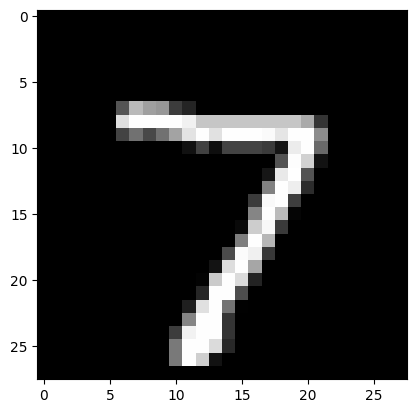

In [57]:
img , label = test_dataset[0]
plt.imshow(img[0] , cmap='gray')
print('Label:' , label , 'Prediction:',predict_image(img,model))

In [58]:
test_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 